# Lab Meeting Demonstration
## June 24, 2021

### Jupyter Basic Introduction

Jupyter Notebook is a web-based interactive computational environment. Jupyter Notebook provides a browser-based REPL (read-eval-print loop, or language shell) and connects to many kernels that allow for programming in different languages. There are more than 49 different Jupyter-compatible kernels for many programming languages including Python, R, etc.

Jupyter runs on cells which can either be code blocks or comments and headers. This cell itself is a comment block where we can provide useful information on our code including background information. These code blocks also support MathJax so we can write math scripts (similar to LaTeX) in these block like:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

To execute a cell including a comment cell, type "Shift + Enter". For comment cells, double clicking allows you to edit the cell.

One of the most useful parts of Jupyter (at least to me) is that you are able to rerun cells without having to rerun the previous cells. For instance:

In [10]:
x = 2

In [12]:
y = x**3
print(y)

8


For computational codes that can take a long time, this is very useful when using outputs from those cells without having to rerun everything as if it were just a .py file.

Graphs can also be displayed inside of the Jupyter notebook

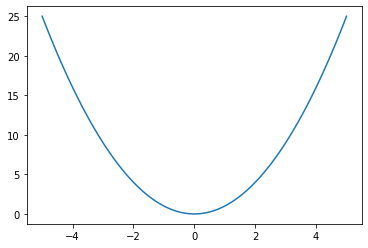

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = x**2

plt.plot(x, y)
plt.show()

## Lake system codes

In [13]:
#import packages
from scipy.integrate import *
from pandas import *
from numpy import *
from pylab import *
from scipy import *
import math
from scipy.interpolate import InterpolatedUnivariateSpline
from IPython import display

#### PROJECT BACKGROUND

Phytoplankton bloom when nutrients and light conditions are favorable for growth. In some eutrophic (high nutrient) lake systems, favorable conditions allow for cyanobacteria blooms to occur. Some blooms can become harmful when oxygen-consuming heterotrophic activity cause anaerobic conditions. Of specific interest is the cyanobacterium Microcystis (blooms in late summer) which release toxins (for an unknown reason) into the environment. 

There is a successional pattern that is observed in multiple lakes. First, eukaryotic algae bloom and are the dominant phytoplankton group throughout the year. Then, in late summer Microcystis bloom and are dominant. 

#### DATA

We have lake data from Lake Taihu in China showing this transition of the dominant phytoplankton groups from eukaryotic algae to Microcystis. 

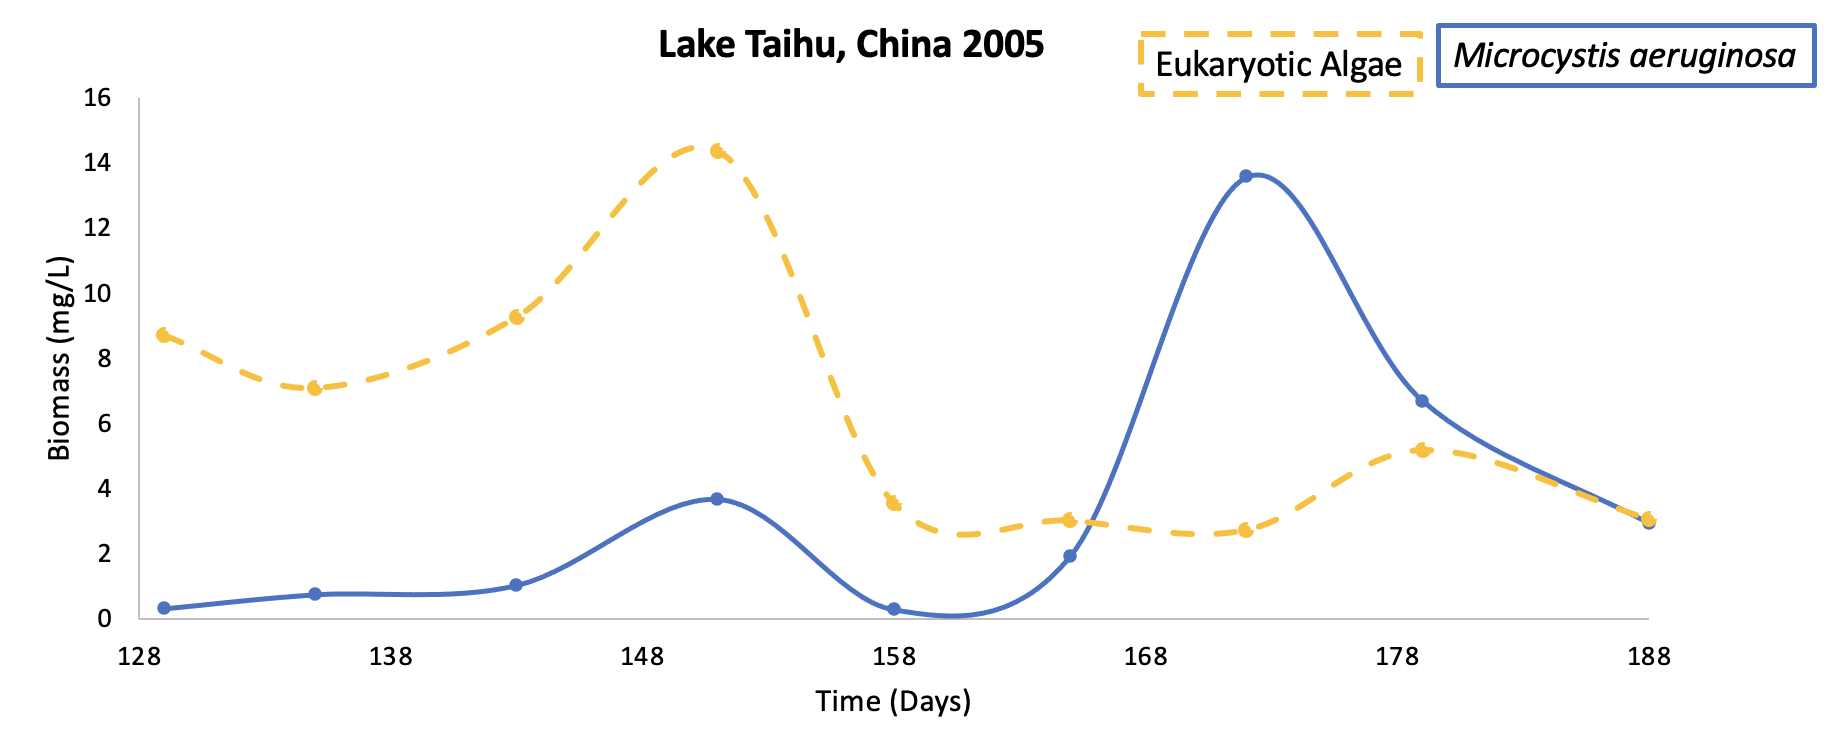

In [16]:
display.Image("lake_taihu_data.png")

#### PROJECT QUESTION

What environmental factors have an impact on Microcystis dominating the ecosystem in late summer?

#### HYPOTHESIS

We hypothesize that shifts in resource inflow select for defense against predation, which may be a major reason why Microcystis are selected for in hyper-eutrophic lakes.

#### SIMPLEST MODEL

This model to start will include a supply rate, a nutrient pool, and 2 producer groups that are taking nutrients from the same nutrient pool. 

Below is an image to show this simple food web:

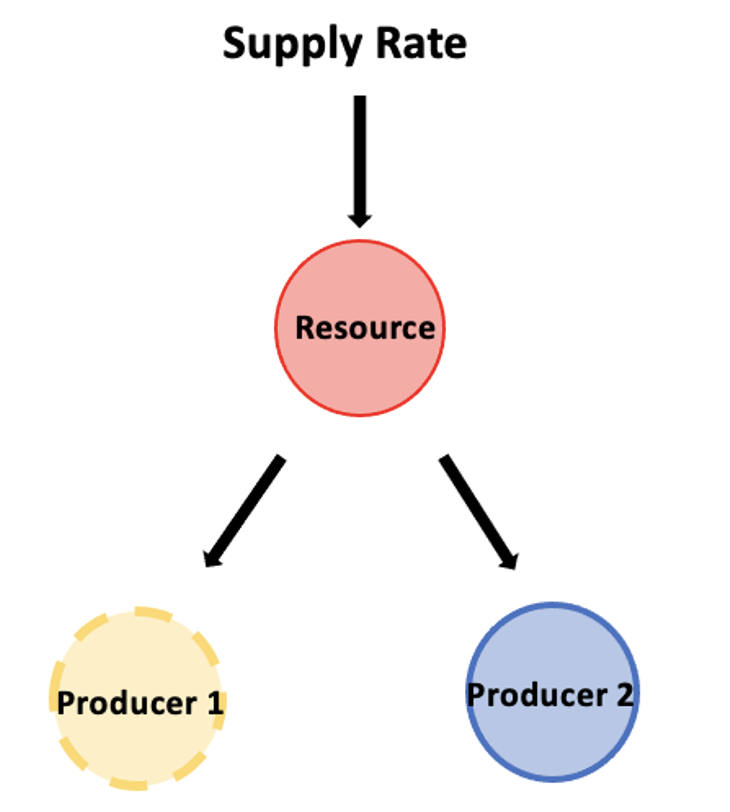

In [34]:
display.Image("food_web1.png", width = 200)

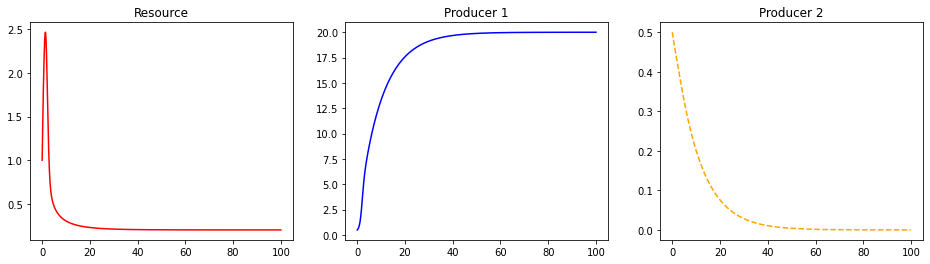

In [113]:
#parameters
mu1 = 0.5 #resource affinity parameter for p1
mu2 = 0.01 #resource affinity parameter for p2
m_p = 0.1 #producer mortality
S_R = 2 #resource supply

# differential  equation function
def simplest_model(y, t, mu1, mu2, m_p):
    R, P1, P2 = y[0], y[1], y[2]
    dRdt = S_R - (mu1*R*P1) - (mu2*R*P2)
    dP1dt = (mu1*R*P1) - (m_p*P1)
    dP2dt = (mu2*R*P2) - (m_p*P2)
    return np.array([dRdt, dP1dt, dP2dt])

T = 100.0 #length of days
delt = 1.0/240.0 #how far apart each time step is
t = np.linspace(0, T, int(T/delt)) #time array

#define initial conditions
R_0 = 1
P1_0 = 0.5
P2_0 = 0.5
y0 = np.array([R_0, P1_0,P2_0]) #array for odeint

#integration
integrate_model = odeint(simplest_model, y0, t, args=(mu1, mu2, m_p))
integrate_model = np.array(integrate_model)
integrate_model = integrate_model.T

#plotting
fig, ax = plt.subplots(1,3,figsize=(16,4))
ax[0].plot(t, integrate_model[0,:], color = 'red')
ax[0].set_title('Resource')
ax[1].plot(t, integrate_model[1,:], color = 'blue')
ax[1].set_title('Producer 1')
ax[2].plot(t, integrate_model[2,:], '--', color = 'orange')
ax[2].set_title('Producer 2')

plt.show()

#### DIAMOND FOOD WEB MODEL

This model to start will include a supply rate, a nutrient pool, 2 producer groups that are taking nutrients from the same nutrient pool, and a consumer group preying on both producer groups. 

Below is an image to show this diamond style food web:

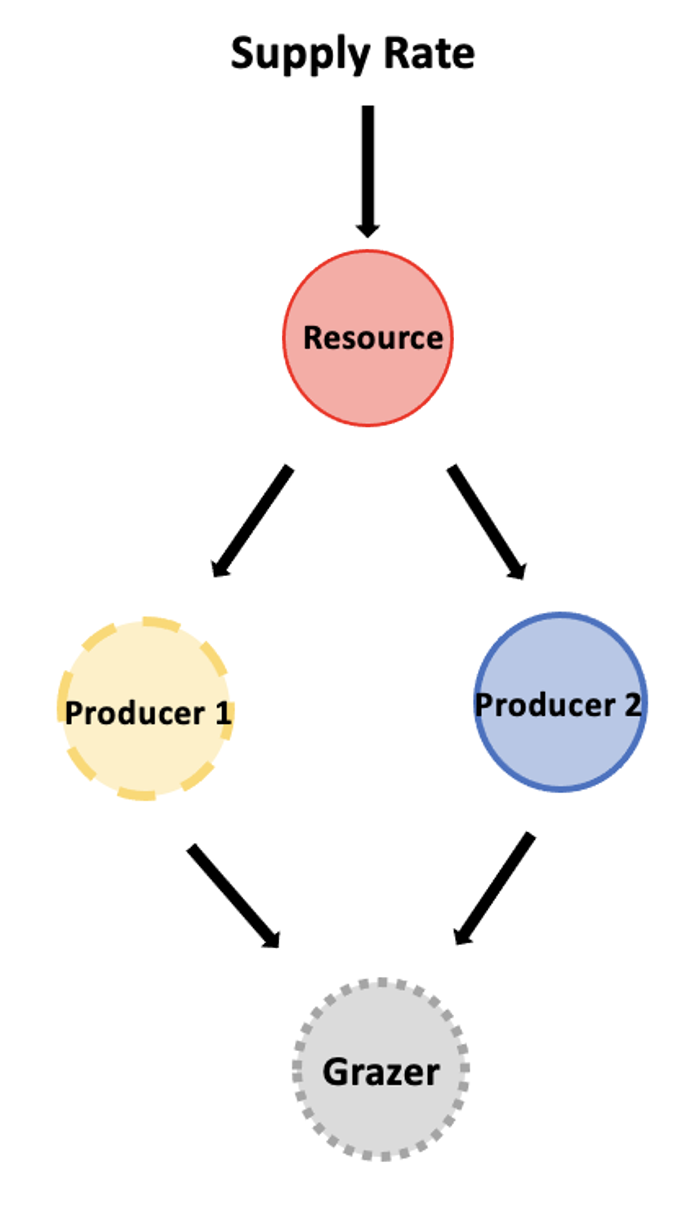

In [114]:
display.Image("food_web2.png", width = 200)

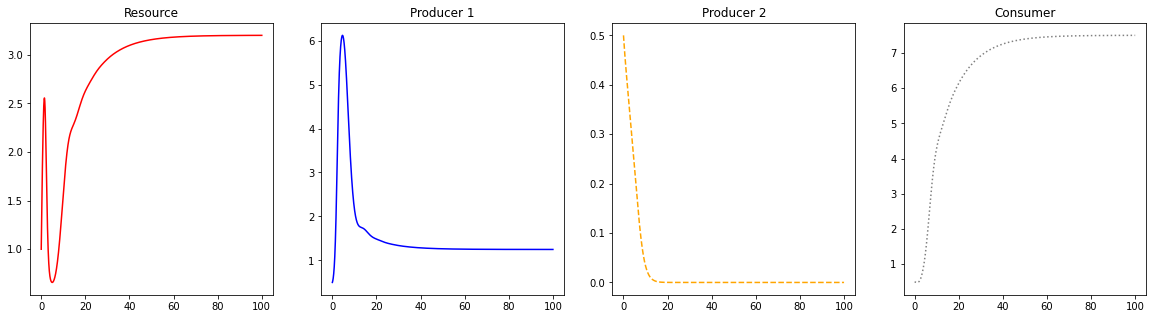

In [115]:
#parameters
mu1 = 0.5 #resource affinity parameter for p1
mu2 = 0.01 #resource affinity parameter for p2
m_p = 0.1 #producer mortality
S_R = 2 #resource supply
phi1 = 0.2 #interaction strength for p1
phi2 = 0.1 #interaction strength for p2
eps1 = 0.4 #transfer efficiency for p1
eps2 = 0.3 #transfer efficiency for p2
m_c = 0.1 #consumer mortality

# differential  equation function
def diamond_model(y, t, mu1, mu2, m_p, phi1, phi2, eps1, eps2, m_c):
    R, P1, P2, C = y[0], y[1], y[2], y[3]
    dRdt = S_R - (mu1*R*P1) - (mu2*R*P2)
    dP1dt = (mu1*R*P1) - (phi1*P1*C)- (m_p*P1)
    dP2dt = (mu2*R*P2) - (phi2*P2*C)- (m_p*P2)
    dCdt = (eps1*phi1*P1*C) + (eps2*phi2*P2*C) - (m_c*C)
    return np.array([dRdt, dP1dt, dP2dt, dCdt])

T = 100.0 #length of days
delt = 1.0/240.0 #how far apart each time step is
t = np.linspace(0, T, int(T/delt)) #time array

#define initial conditions
R_0 = 1
P1_0 = 0.5
P2_0 = 0.5
C_0 = 0.5
y0 = np.array([R_0, P1_0,P2_0,C_0]) #array for odeint

#integration
integrate_model = odeint(diamond_model, y0, t, args=(mu1, mu2, m_p, phi1, phi2, eps1, eps2, m_c))
integrate_model = np.array(integrate_model)
integrate_model = integrate_model.T

#plotting
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].plot(t, integrate_model[0,:], color = 'red')
ax[0].set_title('Resource')
ax[1].plot(t, integrate_model[1,:], color = 'blue')
ax[1].set_title('Producer 1')
ax[2].plot(t, integrate_model[2,:], '--', color = 'orange')
ax[2].set_title('Producer 2')
ax[3].plot(t, integrate_model[3,:], color = 'grey', linestyle = 'dotted')
ax[3].set_title('Consumer')

plt.show()

#### SEASONAL LIGHT CHANGE

50


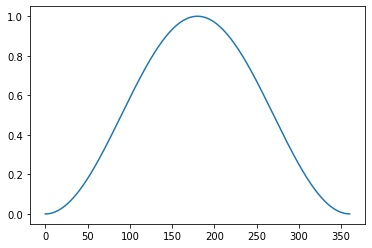

In [116]:
#parameters
T = 360.0 #length of days
delt = 1.0/240.0 #how far apart each time step is
t = np.linspace(0, T, int(T/delt)) #time array
zetas = np.linspace(0,100,50) #depth array
k_w = 0.01 #natural light attenuation constant due to water
print(len(zetas))

#initial irradiance curve
I_naughts = (np.sin(((t)/T*2*math.pi-math.pi/2))+1)/2
plt.plot(t,I_naughts)
plt.show()

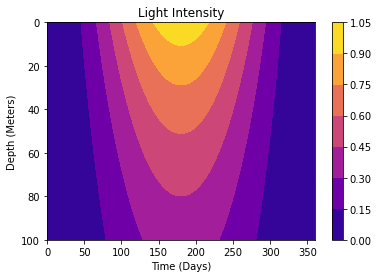

In [117]:
#loop to find the light attenuation at different depths throughout the year
Is = []
for I_naught in I_naughts:
    I = I_naught * np.exp((-k_w*zetas))
    Is.append(I)
light_att = np.array(Is) #make list an array
lights = light_att.T #transpose matrix

#plotting a contour map to show irradiance at different depths throught the year
plt.contourf(t,zetas,lights,cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Light Intensity')
plt.colorbar()
plt.show()
